In [107]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import scipy.signal as sp
from scipy.interpolate import griddata

In [108]:
#Tapete Vazio:
vazio=open("Teste1/tapete_vazio.txt",'r')
vazio=pd.read_csv(vazio,skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS4","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t",decimal=',')
importante= open("DadosImportantes.txt","r")
DadosVazioKs=pd.read_csv(importante,names=["Sen1","Sen2","Sen3","Sen5","Sen6","Sen7","Sen8","K1","K2","K3","K5","K6","K7","K8"],sep="\t")

In [109]:
vazio["PEAKS3"]=vazio["PEAKS4"]
vazio=vazio.drop(["PEAKS4"],axis=1)


In [110]:
picos_vazios=vazio.loc[:,["PEAKS1",'PEAKS2','PEAKS3','PEAKS5',"PEAKS6",'PEAKS7','PEAKS8']]
medias=[]
for i in range (0, 7):
    medias.append(picos_vazios.mean()[i])


In [111]:
#Criando a malha do tapete 

y= np.linspace(0,282,282)    
x=np.linspace(0,420,420)

#forças
tapetepos=np.zeros((len(x),len(y)))

xx,yy= np.meshgrid(x,y)

In [112]:

sensor1=1
sensor2=2
sensor3=3
sensor4=4
sensor5=5
sensor6=6
sensor7=7
sensor8=8


#TAPETEPOS[X][Y]!!
tapetepos[int(2*len(x)/3)-1][int(len(y)/2)-1]=sensor1
tapetepos[int(len(x)/3)-1][int(len(y)/2)-1]=sensor2

tapetepos[int(3*len(x)/4)-1][int(2*len(y)/3)-1]=sensor3
tapetepos[int(len(x)/4)-1][2*int(len(y)/3)-1]=sensor5

tapetepos[int(len(x)/2)-1][int(len(y)/3)-1]=sensor6
tapetepos[int(len(x)/4)-1][int(len(y)/3)-1]=sensor7
tapetepos[int(3*len(x)/4)-1][int(len(y)/3)-1]=sensor8



# Cimento: 4 Posições


In [113]:
cimentopos1=pd.read_csv(open("Teste1/Cimento/N0.2023.05.11.15.55.14(Pos1).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
cimentopos2=pd.read_csv(open("Teste1/Cimento/N0.2023.05.11.15.56.01(Pos2).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
cimentopos3=pd.read_csv(open("Teste1/Cimento/N0.2023.05.11.15.58.04(Pos3).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")
cimentopos4=pd.read_csv(open("Teste1/Cimento/N0.2023.05.11.15.58.47(Pos4).txt","r"),skiprows=65,names=["Timestamp","CH1","CH2","CH3","CH4","CH5","CH6","CH7","CH8","PEAKS1","PEAKS2","PEAKS3","PEAKS5","PEAKS6","PEAKS7","PEAKS8"], sep="\t", decimal=",")





## DELTA LAMBDA DA POSIÇÃO 1 

In [114]:
deltalambda1=np.zeros(7)

deltalambda1[0]= vazio['PEAKS1'].mean() - cimentopos1['PEAKS1'].mean()
deltalambda1[1]= vazio['PEAKS2'].mean() - cimentopos1['PEAKS2'].mean()
deltalambda1[2]= vazio['PEAKS3'].mean() - cimentopos1['PEAKS3'].mean()

deltalambda1[3]= vazio['PEAKS5'].mean() - cimentopos1['PEAKS5'].mean()
deltalambda1[4]= vazio['PEAKS6'].mean() - cimentopos1['PEAKS6'].mean()
deltalambda1[5]= vazio['PEAKS7'].mean() - cimentopos1['PEAKS7'].mean()
deltalambda1[6]= vazio['PEAKS8'].mean() - cimentopos1['PEAKS8'].mean()

deltalambda1


array([-1.31375606e-03, -9.74886345e-05, -1.77336424e-03,  3.37475137e-05,
        9.65767296e-04,  1.24139272e-03,  4.03811458e-03])

## DELTA LAMBDA DA POSIÇÃO 2


In [115]:
deltalambda2=np.zeros(7)

deltalambda2[0]= vazio['PEAKS1'].mean() - cimentopos2['PEAKS1'].mean()
deltalambda2[1]= vazio['PEAKS2'].mean() - cimentopos2['PEAKS2'].mean()
deltalambda2[2]= vazio['PEAKS3'].mean() - cimentopos2['PEAKS3'].mean()

deltalambda2[3]= vazio['PEAKS5'].mean() - cimentopos2['PEAKS5'].mean()
deltalambda2[4]= vazio['PEAKS6'].mean() - cimentopos2['PEAKS6'].mean()
deltalambda2[5]= vazio['PEAKS7'].mean() - cimentopos2['PEAKS7'].mean()
deltalambda2[6]= vazio['PEAKS8'].mean() - cimentopos2['PEAKS8'].mean()

deltalambda2

array([-0.00475469, -0.00028859, -0.00052266,  0.00015232, -0.03186296,
        0.00213507, -0.00310378])

## DELTA LAMBDA DA POSIÇÃO 3


In [116]:
deltalambda3=np.zeros(7)

deltalambda3[0]= vazio['PEAKS1'].mean() - cimentopos3['PEAKS1'].mean()
deltalambda3[1]= vazio['PEAKS2'].mean() - cimentopos3['PEAKS2'].mean()
deltalambda3[2]= vazio['PEAKS3'].mean() - cimentopos3['PEAKS3'].mean()

deltalambda3[3]= vazio['PEAKS5'].mean() - cimentopos3['PEAKS5'].mean()
deltalambda3[4]= vazio['PEAKS6'].mean() - cimentopos3['PEAKS6'].mean()
deltalambda3[5]= vazio['PEAKS7'].mean() - cimentopos3['PEAKS7'].mean()
deltalambda3[6]= vazio['PEAKS8'].mean() - cimentopos3['PEAKS8'].mean()

deltalambda3

array([-6.63585244e-03, -2.47785780e-03,  6.73969316e-06, -1.19046386e-03,
        2.02319898e-04, -8.36481879e-04,  3.06053696e-03])

## DELTA LAMBDA DA POSIÇÃO 4

In [117]:
deltalambda4=np.zeros(7)

deltalambda4[0]= vazio['PEAKS1'].mean() - cimentopos4['PEAKS1'].mean()
deltalambda4[1]= vazio['PEAKS2'].mean() - cimentopos4['PEAKS2'].mean()
deltalambda4[2]= vazio['PEAKS3'].mean() - cimentopos4['PEAKS3'].mean()

deltalambda4[3]= vazio['PEAKS5'].mean() - cimentopos4['PEAKS5'].mean()
deltalambda4[4]= vazio['PEAKS6'].mean() - cimentopos4['PEAKS6'].mean()
deltalambda4[5]= vazio['PEAKS7'].mean() - cimentopos4['PEAKS7'].mean()
deltalambda4[6]= vazio['PEAKS8'].mean() - cimentopos4['PEAKS8'].mean()

deltalambda4

array([-0.00292399,  0.00530865, -0.00344069, -0.00084899, -0.00106978,
       -0.05625242,  0.00275723])

# Heatmap POS 1 

In [118]:
loc1=np.zeros((7,2))
F1=np.zeros(7)

In [119]:
tapetepos1=tapetepos.copy()
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapetepos1[i][j]=(deltalambda1[0])*DadosVazioKs["K1"]#N
            loc1[0]=([i,j-1])
            F1[0]=tapetepos[i][j]
            
        if tapetepos[i][j]==2:
            tapetepos1[i][j]=(deltalambda1[1])*DadosVazioKs["K2"] #N
            loc1[1]=([i,j])
            F1[1]=tapetepos[i][j]

        if tapetepos[i][j]==3:
            tapetepos1[i][j]=(deltalambda1[2])*DadosVazioKs["K3"] #N
            loc1[2]=([i,j-1])
            F1[2]=tapetepos[i][j]

        if tapetepos[i][j]==5:
            tapetepos1[i][j]=((deltalambda1[3])*DadosVazioKs["K5"]) #N
            loc1[3]=([i,j-1])
            F1[3]=tapetepos[i][j]

        if tapetepos[i][j]==6:  
            tapetepos1[i][j]=((deltalambda1[4])*DadosVazioKs["K6"]) #N
            loc1[4]=([i,j-1])
            F1[4]=tapetepos[i][j]
            
        if tapetepos[i][j]==7:
            tapetepos1[i][j]=((deltalambda1[5])*DadosVazioKs["K7"]) #N
            loc1[5]=([i,j-1])
            F1[5]=tapetepos[i][j]
            
        if tapetepos[i][j]==8:
            tapetepos1[i][j]=(deltalambda1[6])*DadosVazioKs["K8"] #N
            loc1[6]=([i,j-1])
            F1[6]=tapetepos[i][j]
       

In [120]:
loc1

array([[279., 139.],
       [139., 140.],
       [314., 186.],
       [104., 186.],
       [209.,  92.],
       [104.,  92.],
       [314.,  92.]])

In [121]:
interp_forcas1= griddata(loc1,F1,(xx,yy))

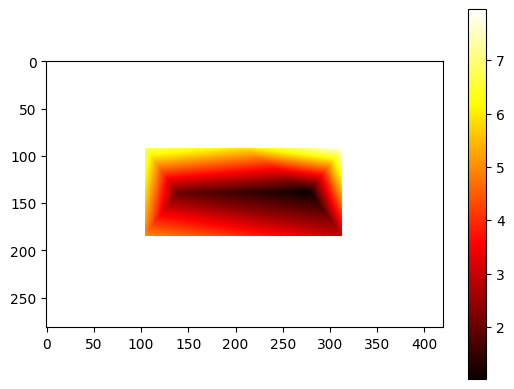

In [122]:
fig, ax = plt.subplots()

im=plt.imshow(interp_forcas1, cmap="hot",interpolation='hanning')

plt.colorbar(im)

# Heatmap POS 2 


In [123]:
loc2=loc1
F2=np.zeros(7)

In [124]:
tapetepos2= tapetepos.copy()
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapetepos2[i][j]=(deltalambda2[0])*DadosVazioKs["K1"]#N
            loc2[0]=([i,j-1])
            F2[0]=tapetepos[i][j]
            
        if tapetepos[i][j]==2:
            tapetepos2[i][j]=(deltalambda2[1])*DadosVazioKs["K2"] #N
            loc2[1]=([i,j])
            F2[1]=tapetepos[i][j]

        if tapetepos[i][j]==3:
            tapetepos2[i][j]=(deltalambda2[2])*DadosVazioKs["K3"] #N
            loc2[2]=([i,j-1])
            F2[2]=tapetepos[i][j]

        if tapetepos[i][j]==5:
            tapetepos2[i][j]=((deltalambda2[3])*DadosVazioKs["K5"]) #N
            loc2[3]=([i,j-1])
            F2[3]=tapetepos[i][j]

        if tapetepos[i][j]==6:  
            tapetepos2[i][j]=((deltalambda2[4])*DadosVazioKs["K6"]) #N
            loc2[4]=([i,j-1])
            F2[4]=tapetepos[i][j]
            
        if tapetepos[i][j]==7:
            tapetepos2[i][j]=((deltalambda2[5])*DadosVazioKs["K7"]) #N
            loc2[5]=([i,j-1])
            F2[5]=tapetepos[i][j]
            
        if tapetepos[i][j]==8:
            tapetepos2[i][j]=(deltalambda2[6])*DadosVazioKs["K8"] #N
            loc2[6]=([i,j-1])
            F2[6]=tapetepos[i][j]

In [125]:
loc2

array([[279., 139.],
       [139., 140.],
       [314., 186.],
       [104., 186.],
       [209.,  92.],
       [104.,  92.],
       [314.,  92.]])

In [126]:
interp_forcas2= griddata(loc2,F2,(xx,yy))

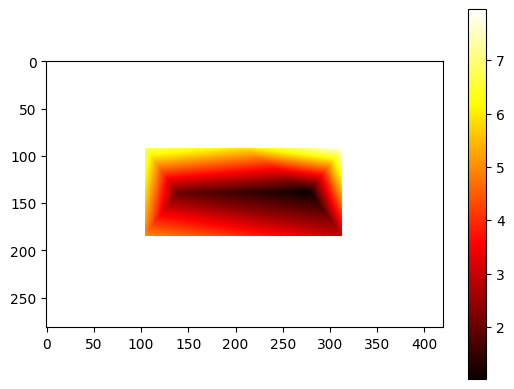

In [127]:
ig, ax = plt.subplots()

im=plt.imshow(interp_forcas2, cmap="hot",interpolation='hanning')

plt.colorbar(im)

# Heatmap POS 3 

In [131]:
loc3=loc1
F3=np.zeros(7)

In [132]:
tapetepos3= tapetepos.copy()
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapetepos3[i][j]=(deltalambda3[0])*DadosVazioKs["K1"]#N
            loc3[0]=([i,j-1])
            F3[0]=tapetepos[i][j]
            
        if tapetepos[i][j]==2:
            tapetepos3[i][j]=(deltalambda3[1])*DadosVazioKs["K2"] #N
            loc3[1]=([i,j])
            F3[1]=tapetepos[i][j]

        if tapetepos[i][j]==3:
            tapetepos3[i][j]=(deltalambda3[2])*DadosVazioKs["K3"] #N
            loc3[2]=([i,j-1])
            F3[2]=tapetepos[i][j]

        if tapetepos[i][j]==5:
            tapetepos3[i][j]=((deltalambda3[3])*DadosVazioKs["K5"]) #N
            loc3[3]=([i,j-1])
            F3[3]=tapetepos[i][j]

        if tapetepos[i][j]==6:  
            tapetepos3[i][j]=((deltalambda3[4])*DadosVazioKs["K6"]) #N
            loc3[4]=([i,j-1])
            F3[4]=tapetepos[i][j]
            
        if tapetepos[i][j]==7:
            tapetepos3[i][j]=((deltalambda3[5])*DadosVazioKs["K7"]) #N
            loc3[5]=([i,j-1])
            F3[5]=tapetepos[i][j]
            
        if tapetepos[i][j]==8:
            tapetepos3[i][j]=(deltalambda3[6])*DadosVazioKs["K8"] #N
            loc3[6]=([i,j-1])
            F3[6]=tapetepos[i][j]

In [133]:
interp_forcas3= griddata(loc3,F3,(xx,yy))

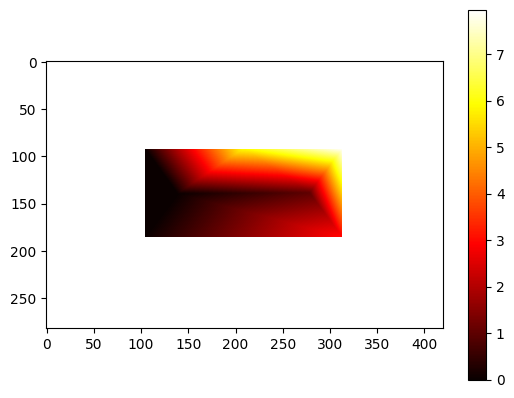

In [134]:
ig, ax = plt.subplots()

im=plt.imshow(interp_forcas3, cmap="hot",interpolation='hanning')

plt.colorbar(im)

# Heatmap POS 4

In [137]:
loc4=loc1
F4=np.zeros(7)

In [138]:
tapetepos4= tapetepos.copy()
for i in range (0,tapetepos.shape[0]):
    for j in range (0,tapetepos.shape[1]):
        if tapetepos[i][j]==1:
            tapetepos4[i][j]=(deltalambda4[0])*DadosVazioKs["K1"]#N
            loc4[0]=([i,j-1])
            F4[0]=tapetepos[i][j]
            
        if tapetepos[i][j]==2:
            tapetepos4[i][j]=(deltalambda4[1])*DadosVazioKs["K2"] #N
            loc4[1]=([i,j])
            F4[1]=tapetepos[i][j]

        if tapetepos[i][j]==3:
            tapetepos4[i][j]=(deltalambda4[2])*DadosVazioKs["K3"] #N
            loc4[2]=([i,j-1])
            F4[2]=tapetepos[i][j]

        if tapetepos[i][j]==5:
            tapetepos4[i][j]=((deltalambda4[3])*DadosVazioKs["K5"]) #N
            loc4[3]=([i,j-1])
            F4[3]=tapetepos[i][j]

        if tapetepos[i][j]==6:  
            tapetepos4[i][j]=((deltalambda4[4])*DadosVazioKs["K6"]) #N
            loc4[4]=([i,j-1])
            F4[4]=tapetepos[i][j]
            
        if tapetepos[i][j]==7:
            tapetepos4[i][j]=((deltalambda4[5])*DadosVazioKs["K7"]) #N
            loc4[5]=([i,j-1])
            F4[5]=tapetepos[i][j]
            
        if tapetepos[i][j]==8:
            tapetepos4[i][j]=(deltalambda4[6])*DadosVazioKs["K8"] #N
            loc4[6]=([i,j-1])
            F4[6]=tapetepos[i][j]

In [139]:
interp_forcas4= griddata(loc4,F4,(xx,yy))

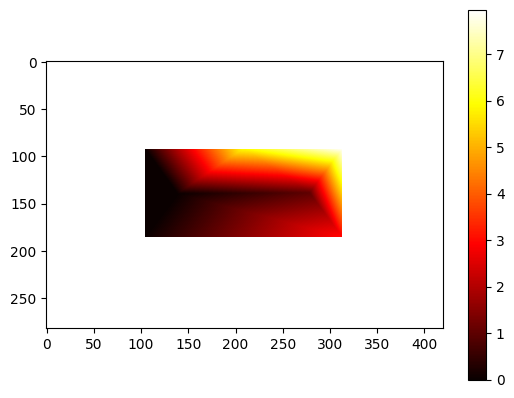

In [140]:
ig, ax = plt.subplots()

im=plt.imshow(interp_forcas4, cmap="hot",interpolation='hanning')

plt.colorbar(im)